In [72]:
import pandas as pd
import os
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/My Drive/SERIE HISTORICA INVERSIONES MOP 2010-2021/

/content/drive/My Drive/SERIE HISTORICA INVERSIONES MOP 2010-2021


In [74]:
%matplotlib inline
import pandas as pd

In [78]:
df_inversiones = pd.read_csv('notebooks/data/enriched_inversiones.csv')

In [79]:
df_inversiones

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,PROGRAMA_INVERSIÓN,INVERSION_SERVICIO_PROMEDIO,INVERSION_REGION_PROMEDIO,INVERSION_AÑO_PROMEDIO,HAS_WORD_CONSERVACION
0,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,1.090802e+04,EDIFICIOS MOP,195,407036.051478,8.994213e+05,982742.707315,False
1,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,3.948023e+05,EDIFICIOS MOP,195,407036.051478,8.994213e+05,982742.707315,False
2,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,1.253289e+04,EDIFICIOS MOP,195,407036.051478,8.697931e+05,982742.707315,False
3,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.032167e+06,EDIFICIOS MOP,195,407036.051478,8.697931e+05,982742.707315,False
4,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.430104e+05,EDIFICIOS MOP,195,407036.051478,8.697931e+05,982742.707315,False
...,...,...,...,...,...,...,...,...,...,...,...
26958,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION INVENTARIO D° DE AGUA AFECTO PAGO...,4.653396e+04,GESTION Y FISCALIZACION,61,377040.431739,1.147678e+06,719884.915099,True
26959,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION INVENTARIO D° DE AGUA AFECTO PAGO...,5.505016e+04,GESTION Y FISCALIZACION,61,377040.431739,1.147678e+06,719884.915099,True
26960,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION CONSERVACIÓN ESTACIONES FLUVIOMÉT...,1.000000e+05,MANTENCION Y OPERACIÓN DE LA RED DE CALIDAD DE...,97,377040.431739,1.147678e+06,719884.915099,True
26961,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION CONSERVACIÓN ESTACIONES FLUVIOMÉT...,2.071410e+06,MANTENCION Y OPERACIÓN DE LA RED DE CALIDAD DE...,97,377040.431739,1.147678e+06,719884.915099,True


# Probrar un modelo supervisado

In [80]:
data = df_inversiones.copy()
for i, colum in enumerate(list([str(d) for d in data.dtypes])):
  if colum == "object":
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
    data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
  else:
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [81]:
data.head(5)

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,PROGRAMA_INVERSIÓN,INVERSION_SERVICIO_PROMEDIO,INVERSION_REGION_PROMEDIO,INVERSION_AÑO_PROMEDIO,HAS_WORD_CONSERVACION
0,2010,9,2,348,1.090802e+04,28,195,407036.051478,899421.332694,982742.707315,False
1,2010,9,2,348,3.948023e+05,28,195,407036.051478,899421.332694,982742.707315,False
2,2010,9,6,3867,1.253289e+04,28,195,407036.051478,869793.085316,982742.707315,False
3,2010,9,6,3867,3.032167e+06,28,195,407036.051478,869793.085316,982742.707315,False
4,2010,9,6,3867,3.430104e+05,28,195,407036.051478,869793.085316,982742.707315,False


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [83]:
y = data.pop('INVERSIÓN (MILES DE $ AÑO 2021)')
x = data.copy()

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [117]:
clf = RandomForestRegressor(n_estimators=4000, max_depth = 15)

In [118]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=4000)

In [91]:
from sklearn.metrics import r2_score

In [119]:
r2_score(y_test, clf.predict(x_test))

0.17176994167152004

# Probar un modelo no supervisado o de clustering para texto

In [120]:
import gensim
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2021)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
def preprocess(text):
  result = []
  for token in text.split():
    if token not in stopwords.words('spanish') and len(token)>4:
      result.append(token)
  return result

In [122]:
process_services = [preprocess(x) for x in list(df_inversiones['NOMBRE'].unique())]

In [123]:
dictionary = gensim.corpora.Dictionary(process_services)

In [124]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [125]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_services]

In [126]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=10, workers=2)

In [127]:
for idx, type_services in lda_model.print_topics(-1):
  print('Topic:{} Words:{}'.format(idx, type_services))

Topic:0 Words:0.115*"MEJORAMIENTO" + 0.039*"SECTOR" + 0.026*"SISTEMA" + 0.020*"CONSTRUCCION" + 0.019*"SECTOR:" + 0.017*"CRUCE" + 0.016*"AMPLIACION" + 0.010*"COSTERO" + 0.010*"BORDE" + 0.009*"REPOSICION"
Topic:1 Words:0.041*"CONSTRUCCION" + 0.021*"REPOSICION" + 0.016*"PUERTO" + 0.016*"CALETA" + 0.016*"COMUNA" + 0.015*"AEROPUERTO" + 0.013*"PUENTES" + 0.012*"CONSTRUCCIÓN" + 0.012*"INFRAESTRUCTURA" + 0.012*"SECTOR:"
Topic:2 Words:0.051*"MEJORAMIENTO" + 0.034*"AMPLIACIÓN" + 0.030*"OBRAS" + 0.022*"REPOSICION" + 0.021*"SECTOR:" + 0.015*"CONSTRUCCION" + 0.014*"PORTUARIAS" + 0.013*"SERVICIO" + 0.013*"CONSERVACION" + 0.012*"PAVIMENTO"
Topic:3 Words:0.049*"PUENTE" + 0.041*"MEJORAMIENTO" + 0.021*"REPOSICION" + 0.019*"CONCESIÓN" + 0.016*"SANTIAGO" + 0.015*"SISTEMA" + 0.013*"TRAMO" + 0.012*"FISCAL)" + 0.012*"ACCESO" + 0.011*"CONSTRUCCION"
Topic:4 Words:0.061*"CONSTRUCCION" + 0.048*"SISTEMA" + 0.047*"SERVICIO" + 0.046*"COMUNA" + 0.041*"CONSERVACION" + 0.041*"POTABLE" + 0.040*"RURAL" + 0.025*"REGION" 

In [128]:
def get_max_topic(index):
  results = lda_model[bow_corpus[index]]
  return max(lda_model[results], key=lambda x: x[1])[0]

In [129]:
services_cluster = {x: get_max_topic(i) for i, x in enumerate(list(df_inversiones['NOMBRE'].unique()))}

In [130]:
df_inversiones['CLUSTER_NAME'] = df_inversiones['NOMBRE'].apply(lambda x: services_cluster[x])

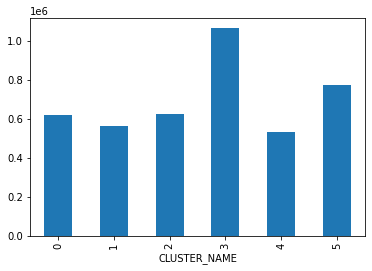

In [131]:
df_inversiones.groupby('CLUSTER_NAME')['INVERSIÓN (MILES DE $ AÑO 2021)'].mean().plot.bar()

# Probar un modelo no supervisado de anomalías en cuanto a inversiones

In [132]:
import numpy as np
from scipy.stats import norm

In [133]:
params = norm.fit(df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'])

In [134]:
params

(791620.845641881, 2576684.212373665)

In [135]:
df_inversiones['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)']]

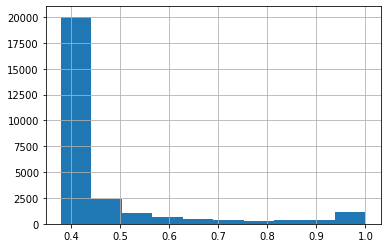

In [136]:
df_inversiones['PROB_TOTAL'].hist()

In [137]:
df_inversiones[df_inversiones['PROB_TOTAL']>0.95]

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,PROGRAMA_INVERSIÓN,INVERSION_SERVICIO_PROMEDIO,INVERSION_REGION_PROMEDIO,INVERSION_AÑO_PROMEDIO,HAS_WORD_CONSERVACION,CLUSTER_NAME,PROB_TOTAL
16,2010,Dirección de Arquitectura,Metropolitana,HABILITACION CENTRO GABRIELA MISTRAL SANTIAGO,1.180737e+07,INFRAESTRUCTURA CULTURAL,65,4.070361e+05,1.025218e+06,982742.707315,False,2,0.999990
71,2010,Dirección de Obras Hidráulicas,Coquimbo,CONSTRUCCION EMBALSE EL BATO - RIO ILLAPEL,5.198899e+06,GRANDES OBRAS DE RIEGO,316,6.216542e+05,8.697931e+05,982742.707315,False,2,0.956408
118,2010,Dirección de Obras Hidráulicas,Maule,"CONSTRUCCION SISTEMA DE REGADIO ANCOA, PROVINC...",2.769901e+07,GRANDES OBRAS DE RIEGO,316,6.216542e+05,8.114011e+05,982742.707315,False,2,1.000000
202,2010,Dirección de Vialidad,Arica y Parinacota,CONSERVACION RED VIAL REGION ARICA Y PARINACOT...,7.187620e+06,CONSERVACION VIAL,4655,9.342855e+05,8.994213e+05,982742.707315,True,3,0.993472
207,2010,Dirección de Vialidad,Tarapacá,REPOSICION PAVIMENTO RUTA 5 SECTOR: PINTADOS B...,9.246507e+06,CAMINOS NACIONALES,672,9.342855e+05,7.371629e+05,982742.707315,False,2,0.999483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26830,2021,Dirección General de Concesiones,No Regionalizable,AUTOPISTA SANTIAGO - SAN ANTONIO (COMPENSACION...,2.288723e+07,VIALIDAD INTERURBANA,661,1.411791e+06,1.147678e+06,719884.915099,False,3,1.000000
26834,2021,Dirección General de Concesiones,No Regionalizable,CONCESIÓN RUTA 5 TRAMO RÍO BUENO - PUERTO MONT...,2.717227e+07,RUTA 5,506,1.411791e+06,1.147678e+06,719884.915099,False,5,1.000000
26856,2021,Dirección General de Concesiones,No Regionalizable,CONCESIÓN RUTA 5 TRAMO SANTIAGO - LOS VILOS (C...,8.491397e+06,RUTA 5,506,1.411791e+06,1.147678e+06,719884.915099,False,3,0.998597
26859,2021,Dirección General de Concesiones,No Regionalizable,CONCESIÓN RUTA 5 TRAMO SANTIAGO-TALCA Y ACCESO...,5.254458e+06,RUTA 5,506,1.411791e+06,1.147678e+06,719884.915099,False,3,0.958364


In [138]:
models_services={}
for service in list(df_inversiones['SERVICIO'].unique()):
  service_inversion = df_inversiones[df_inversiones['SERVICIO'] == service]
  params = norm.fit(service_inversion['INVERSIÓN (MILES DE $ AÑO 2021)'])
  models_services[service] = norm(params[0], params[1])

In [139]:
service_prob = []
for i, row in df_inversiones.iterrows():
  service_prob.append(models_services[row['SERVICIO']].cdf(row['INVERSIÓN (MILES DE $ AÑO 2021)']))
df_inversiones['PROB_SERVICE'] = service_prob

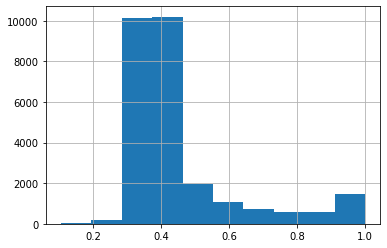

In [140]:
df_inversiones['PROB_SERVICE'].hist()

In [141]:
df_inversiones[df_inversiones['PROB_SERVICE']>0.95].head()

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,PROGRAMA_INVERSIÓN,INVERSION_SERVICIO_PROMEDIO,INVERSION_REGION_PROMEDIO,INVERSION_AÑO_PROMEDIO,HAS_WORD_CONSERVACION,CLUSTER_NAME,PROB_TOTAL,PROB_SERVICE
3,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.032167e+06,EDIFICIOS MOP,195,407036.051478,8.697931e+05,982742.707315,False,3,0.807726,0.970410
7,2010,Dirección de Arquitectura,Valparaíso,CONSTRUCCION PARQUE CULTURAL CERRO CARCEL DE V...,4.777443e+06,INFRAESTRUCTURA CULTURAL,65,407036.051478,8.039731e+05,982742.707315,False,2,0.939054,0.999159
16,2010,Dirección de Arquitectura,Metropolitana,HABILITACION CENTRO GABRIELA MISTRAL SANTIAGO,1.180737e+07,INFRAESTRUCTURA CULTURAL,65,407036.051478,1.025218e+06,982742.707315,False,2,0.999990,1.000000
71,2010,Dirección de Obras Hidráulicas,Coquimbo,CONSTRUCCION EMBALSE EL BATO - RIO ILLAPEL,5.198899e+06,GRANDES OBRAS DE RIEGO,316,621654.200914,8.697931e+05,982742.707315,False,2,0.956408,0.988543
118,2010,Dirección de Obras Hidráulicas,Maule,"CONSTRUCCION SISTEMA DE REGADIO ANCOA, PROVINC...",2.769901e+07,GRANDES OBRAS DE RIEGO,316,621654.200914,8.114011e+05,982742.707315,False,2,1.000000,1.000000


# Formulando conclusiones

* Plantear la tendencia central
* Hay historias en los outliers
* Esfuerzate en contestar la pregunta original
* Si tu enfoque cambió, documéntalo.